In [150]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
mnsdf=pd.read_csv('train.csv')

In [152]:
mnsdf.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
label=mnsdf['label']

In [154]:
data=mnsdf.drop("label",axis=1)

In [155]:
sampl=label.head(15000)
sampd=data.head(15000)


In [156]:
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(sampd)
#convert the feature(784 pixels) values to form with mean=0 and std=1
std_data.shape

c:\users\trusha\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\trusha\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(15000, 784)

In [157]:
std_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
 #covariance matrix
std_data.shape==sampd.shape

True

In [159]:
cov_mat=np.matmul(std_data.T,std_data)

In [160]:
cov_mat.shape

(784, 784)

In [161]:
#Finding two principal compone
from scipy.linalg import eigh

In [162]:
#eigvals defin low to high values of eigen values
#we need only top two-783,784 with 0 index:782,783
val,vec=eigh(cov_mat,eigvals=(782,783))

In [163]:
val
vec=vec.T

In [172]:
print(vec.shape) 
coro=np.matmul(vec, std_data.T)
#coro2=np.matmul(vec, sampd.T)-This gives error no idea why

(2, 784)


In [173]:
coro.shape


(2, 15000)

In [208]:
#we need same shape in vertical
print(sampl.shape)
print(coro.shape)

(15000,)
(2, 15000)


In [209]:
#add 3rd col
newd=np.vstack((coro,sampl))

In [210]:
newd.shape

(3, 15000)

In [211]:
newd


array([[-5.5586608 ,  6.19363477, -1.90987794, ..., -2.14793723,
         3.20412249, -6.87896871],
       [-5.04355835, 19.30527806, -7.67877525, ..., -1.50726893,
        -6.53731291, -1.25625388],
       [ 1.        ,  0.        ,  1.        , ...,  8.        ,
         9.        ,  6.        ]])

In [212]:
coro2=coro.T

In [213]:
sampl2=sampl.T

In [216]:
newd2=np.hstack((coro2,sampl))#same both dimas for horizontal concatination

ValueError: all the input arrays must have same number of dimensions

In [217]:
newdf=pd.DataFrame(newd.T, columns=('1stPc','2ndPc','label'))

In [218]:
import seaborn as sns

c:\users\trusha\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\users\trusha\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


c:\users\trusha\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


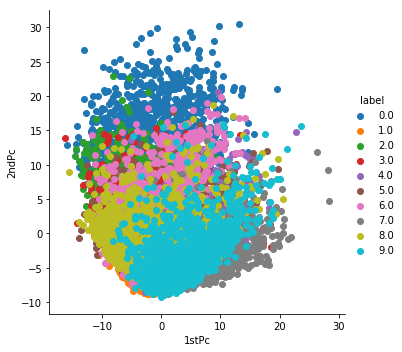

In [219]:
sns.FacetGrid(newdf,hue='label',size=5)\
   .map(plt.scatter,'1stPc','2ndPc')\
   .add_legend()